##Constructing a function that will return a set_df of a provided set accelerometer data

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import find_peaks

In [20]:
path_a = r'/content/drive/MyDrive/Gym tracker/Data/squat_accel_self_data/squats_phone.csv'
path_b = r'/content/drive/MyDrive/Gym tracker/Data/squat_accel_mother_data/Squa_mother_49.csv'

In [21]:
def setbuilder(path, set_id, exercise, age, date):

  # removing first and last second
  df = pd.read_csv(path)
  time = df['time'].values
  mask = (time>= 3) & (time <= time[-1] -2) # removes first and last second
  df = df[mask].reset_index(drop=True)

  # smoothening data
  window = 25
  a_smooth = np.convolve(df.a_mag, np.ones(window)/window, mode = 'same') # every 25 values contain same value, i.e avearage of them where each data point carries same weight

  # finding valleys
  valleys,_ = find_peaks(-a_smooth, distance = 10, height = -(8.0), prominence = 5.4) # peaks to valleys with -ve, #NOTE the height parameter should be changed to something adaptive to user, staying to fixed value for now for simplicity

  # finding time intervals between reps
  time_stamp = df.time[valleys]
  time_intervals = []
  for i in range(len(time_stamp)):
    if i == 0:
     time_intervals.append(time_stamp.iloc[i])
    else:
     time_intervals.append(time_stamp.iloc[i] - time_stamp.iloc[i-1])
  time_intervals_list = list(map(lambda x: float(x), time_intervals)) # in python list type

  # depth of each rep
  rep_depth = a_smooth[valleys]

  # rep numbering and time stamp of each rep
  rep_no = list(range(1, len(rep_depth) +1))
  rep_time = time_stamp # for easier intuition

  #finding peaks of a_smooth
  peaks,_ = find_peaks(a_smooth, distance = 100, height = (7.0), prominence = 5.4)

  # finding range of each rep (peak - valley before)
  valley_a = a_smooth[valleys]
  peak_a = a_smooth[peaks]

  range_a = []

  for i in range(len(valley_a) -1): # last valley corresponds to no peak
    range_a.append(peak_a[i+1] - valley_a[i]) # peak - valley before | valleys are when the user is decelerating towards the ground and peaks are when user is shooting up

  range_a = list(map(float, range_a))

  set_df = pd.DataFrame({
    # metadata
    "set_id": set_id,
    "set_size": len(rep_no),
    "exercise": exercise,
    "age": age,
    "date": pd.to_datetime(date, dayfirst = True),
    # rep features
    "rep_in_set": rep_no[1:-1],                  # 2 to 7
    "rep_time": rep_time[1:-1],                  # times of reps 2 to 8
    "rep_interval": time_intervals_list[1:-1],   # true intervals only (2-7)
    "rep_depth": rep_depth[1:-1],                # depths of reps 2 to 7
    "range_a":range_a[1:]                        # peak - valley before difference gives 2 to 7
  }).reset_index(drop = True)

  # removed last rep to ensure range  corresponds to others

  set_df.head(100)

  # rows = reps, columns = rep features

  return set_df

In [22]:
set_df1 = setbuilder(path_a, 1, 'squat', 16, '20/2/26')
set_df2 = setbuilder(path_b, 2, 'squat', 49, '24/2/26')

In [23]:
set_df1.head(100)

,set_id,set_size,exercise,age,date,rep_in_set,rep_time,rep_interval,rep_depth,range_a
0,1,8,squat,16,2026-02-20,2,9.547486,3.440572,6.652164,5.450337
1,1,8,squat,16,2026-02-20,3,11.583569,2.036082,6.032538,6.544385
2,1,8,squat,16,2026-02-20,4,13.571690,1.988121,4.882637,7.685923
3,1,8,squat,16,2026-02-20,5,15.745089,2.173399,5.821606,6.538354
4,1,8,squat,16,2026-02-20,6,17.905983,2.160894,5.602340,7.040404
5,1,8,squat,16,2026-02-20,7,20.122718,2.216735,6.214733,8.636096


In [24]:
set_df2.head(100)

,set_id,set_size,exercise,age,date,rep_in_set,rep_time,rep_interval,rep_depth,range_a
0,2,28,squat,49,2026-02-24,2,7.643412,2.787835,7.756051,5.878306
1,2,28,squat,49,2026-02-24,3,9.717951,2.074539,7.149685,7.267471
2,2,28,squat,49,2026-02-24,4,11.114713,1.396762,7.296745,6.452397
3,2,28,squat,49,2026-02-24,5,13.257494,2.142781,7.033298,7.008547
4,2,28,squat,49,2026-02-24,6,15.453815,2.196320,6.620966,7.630756
5,2,28,squat,49,2026-02-24,7,18.513691,3.059877,7.220669,7.233613
6,2,28,squat,49,2026-02-24,8,20.735403,2.221712,6.810936,7.342179
7,2,28,squat,49,2026-02-24,9,22.129239,1.393837,7.493426,7.424891
8,2,28,squat,49,2026-02-24,10,24.335824,2.206585,6.872419,7.351170
9,2,28,squat,49,2026-02-24,11,27.616124,3.280300,7.408390,7.004668


In [25]:
set_df_main = pd.concat([set_df1, set_df2], ignore_index = True)
set_df_main.head(100)

,set_id,set_size,exercise,age,date,rep_in_set,rep_time,rep_interval,rep_depth,range_a
0,1,8,squat,16,2026-02-20,2,9.547486,3.440572,6.652164,5.450337
1,1,8,squat,16,2026-02-20,3,11.583569,2.036082,6.032538,6.544385
2,1,8,squat,16,2026-02-20,4,13.571690,1.988121,4.882637,7.685923
3,1,8,squat,16,2026-02-20,5,15.745089,2.173399,5.821606,6.538354
4,1,8,squat,16,2026-02-20,6,17.905983,2.160894,5.602340,7.040404
5,1,8,squat,16,2026-02-20,7,20.122718,2.216735,6.214733,8.636096
6,2,28,squat,49,2026-02-24,2,7.643412,2.787835,7.756051,5.878306
7,2,28,squat,49,2026-02-24,3,9.717951,2.074539,7.149685,7.267471
8,2,28,squat,49,2026-02-24,4,11.114713,1.396762,7.296745,6.452397
9,2,28,squat,49,2026-02-24,5,13.257494,2.142781,7.033298,7.008547


In [26]:
#fatigue detection

In [27]:
t_min = set_df2['rep_interval'].min()
t_max = set_df2['rep_interval'].max()
norm_time = []
for i in set_df2['rep_interval']:
  norm_time.append((i-t_min)/(t_max-t_min))
print(norm_time)

r_min = set_df2['range_a'].min()
r_max = set_df2['range_a'].max()
norm_range = []
for i in set_df2['range_a']:
  norm_range.append((i-r_min)/(r_max-r_min))
print(norm_range)

[0.7873149519944281, 0.4931913282509796, 0.21371414374068937, 0.5213306964700254, 0.5434072553117019, 0.8994895225868476, 0.5538771658624411, 0.21250778005622037, 0.5476396413578118, 0.9903798439690865, 0.1980041549519549, 0.6050899107774433, 0.9559669156731339, 0.5643895973328681, 0.5517226640142908, 0.16341250849258718, 0.5527187553183329, 1.0, 0.6092744319248203, 0.2377896006258458, 0.0, 0.5233863594464782, 0.17082109425714764, 0.5631842414172854, 0.5414254060458146, 0.5674654654941178]
[0.0, 0.3348646494391252, 0.1383872053367851, 0.27244992659239775, 0.4224363437127658, 0.3267030874952792, 0.35287351287605767, 0.37281142423963654, 0.3550408363924878, 0.2715147329271824, 0.36836673145891297, 0.32321720485295985, 0.5146569778936338, 0.5998222254164154, 0.5251699901581044, 0.5841108059778287, 0.7298646455937726, 0.7251353054880881, 0.6791310344844641, 1.0, 0.5153858504076012, 0.19555856081323034, 0.13846536748725838, 0.481330264467623, 0.4259427367809899, 0.3725333978379617]


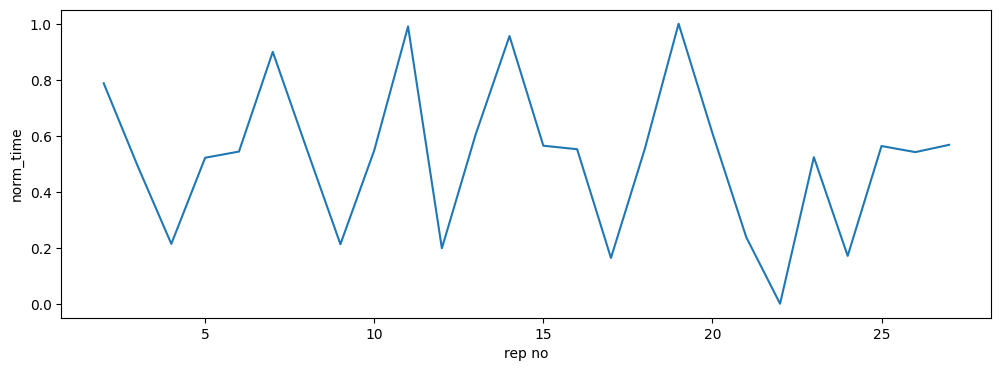

In [28]:
plt.figure(figsize = (12,4))
plt.plot(set_df2['rep_in_set'], norm_time)
plt.ylabel('norm_time')
plt.xlabel('rep no')
plt.show()

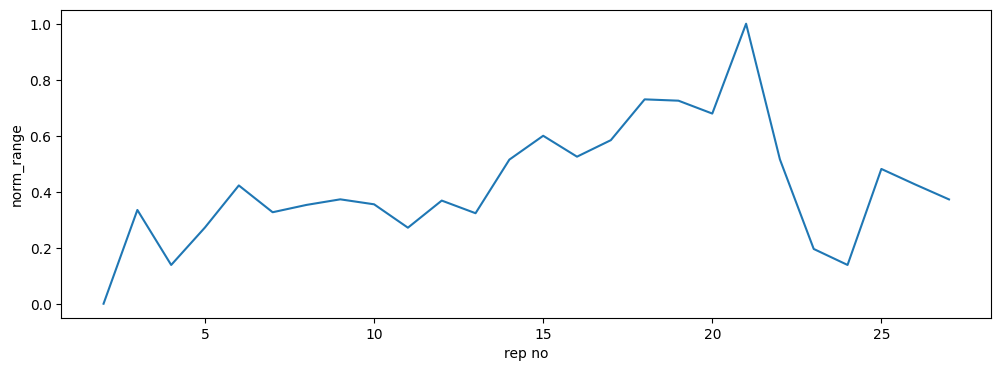

In [29]:
plt.figure(figsize = (12,4))
plt.plot(set_df2['rep_in_set'], norm_range)
plt.ylabel('norm_range')
plt.xlabel('rep no')
plt.show()

In [30]:
set_df2['norm_time'] = norm_time
set_df2.head()

,set_id,set_size,exercise,age,date,rep_in_set,rep_time,rep_interval,rep_depth,range_a,norm_time
0,2,28,squat,49,2026-02-24,2,7.643412,2.787835,7.756051,5.878306,0.787315
1,2,28,squat,49,2026-02-24,3,9.717951,2.074539,7.149685,7.267471,0.493191
2,2,28,squat,49,2026-02-24,4,11.114713,1.396762,7.296745,6.452397,0.213714
3,2,28,squat,49,2026-02-24,5,13.257494,2.142781,7.033298,7.008547,0.521331
4,2,28,squat,49,2026-02-24,6,15.453815,2.196320,6.620966,7.630756,0.543407


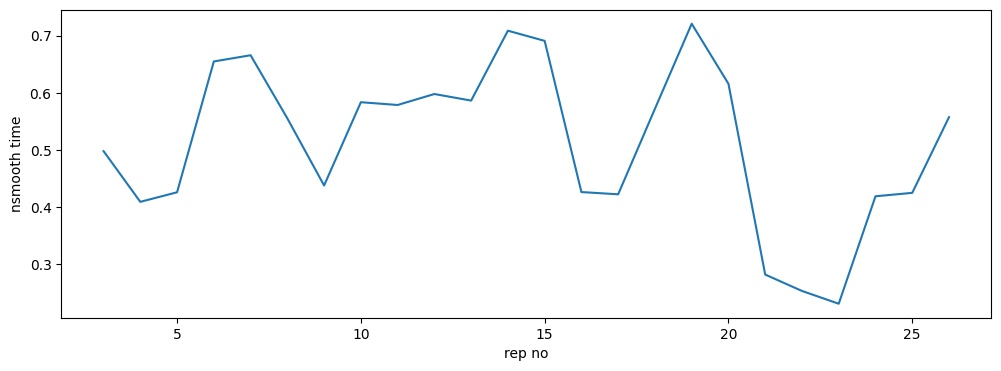

In [34]:
plt.figure(figsize = (12,4))
plt.plot(set_df2['rep_in_set'], set_df2['norm_time'].rolling(3, center = True).mean())
plt.ylabel('nsmooth time')
plt.xlabel('rep no')
plt.show()